In [16]:
!pip install "gymnasium[classic-control]" 
!pip install moviepy
!pip install torch


  Using cached torch-2.9.1-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_6

In [5]:
import gymnasium as gym


# Create our training environment - a cart with a pole that needs balancing
env = gym.make("CartPole-v1", render_mode="human")

# Reset environment to start a new episode
observation, info = env.reset()
# observation: what the agent can "see" - cart position, velocity, pole angle, etc.
# info: extra debugging information (usually not needed for basic learning)

print(f"Starting observation: {observation}")
# Example output: [ 0.01234567 -0.00987654  0.02345678  0.01456789]
# [cart_position, cart_velocity, pole_angle, pole_angular_velocity]

episode_over = False
total_reward = 0

while not episode_over:
    # Choose an action: 0 = push cart left, 1 = push cart right
    action = env.action_space.sample()  # Random action for now - real agents will be smarter!

    # Take the action and see what happens
    observation, reward, terminated, truncated, info = env.step(action)

    # reward: +1 for each step the pole stays upright
    # terminated: True if pole falls too far (agent failed)
    # truncated: True if we hit the time limit (500 steps)

    total_reward += reward
    episode_over = terminated or truncated

print(f"Episode finished! Total reward: {total_reward}")
env.close()

Starting observation: [-0.03646459  0.04542158 -0.03414001  0.02166045]
Episode finished! Total reward: 17.0


# Example of Recoding all episodes for initial Testing

In [8]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
import numpy as np

# Configuration
num_eval_episodes = 4
env_name = "CartPole-v1"  # Replace with your environment

# Create environment with recording capabilities
env = gym.make(env_name, render_mode="rgb_array")  # rgb_array needed for video recording

# Add video recording for every episode
env = RecordVideo(
    env,
    video_folder="cartpole-agent",    # Folder to save videos
    name_prefix="eval",               # Prefix for video filenames
    episode_trigger=lambda x: True    # Record every episode
)

# Add episode statistics tracking
env = RecordEpisodeStatistics(env, buffer_length=num_eval_episodes)

print(f"Starting evaluation for {num_eval_episodes} episodes...")
print(f"Videos will be saved to: cartpole-agent/")

for episode_num in range(num_eval_episodes):
    obs, info = env.reset()
    episode_reward = 0
    step_count = 0

    episode_over = False
    while not episode_over:
        # Replace this with your trained agent's policy
        action = env.action_space.sample()  # Random policy for demonstration

        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        step_count += 1

        episode_over = terminated or truncated

    print(f"Episode {episode_num + 1}: {step_count} steps, reward = {episode_reward}")

env.close()

# Print summary statistics
print(f'\nEvaluation Summary:')
print(f'Episode durations: {list(env.time_queue)}')
print(f'Episode rewards: {list(env.return_queue)}')
print(f'Episode lengths: {list(env.length_queue)}')

# Calculate some useful metrics
avg_reward = np.sum(env.return_queue)
avg_length = np.sum(env.length_queue)
std_reward = np.std(env.return_queue)

print(f'\nAverage reward: {avg_reward:.2f} ± {std_reward:.2f}')
print(f'Average episode length: {avg_length:.1f} steps')
print(f'Success rate: {sum(1 for r in env.return_queue if r > 0) / len(env.return_queue):.1%}')

/home/f4zination/development/DQN-SpaceInvaders/.venv/lib/python3.13/site-packages/gymnasium/wrappers/rendering.py:293: UserWarning: WARN: Overwriting existing videos at /home/f4zination/development/DQN-SpaceInvaders/cartpole-agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Starting evaluation for 4 episodes...
Videos will be saved to: cartpole-agent/
Episode 1: 19 steps, reward = 19.0
Episode 2: 18 steps, reward = 18.0
Episode 3: 23 steps, reward = 23.0
Episode 4: 32 steps, reward = 32.0

Evaluation Summary:
Episode durations: [0.02499, 0.020144, 0.026252, 0.037155]
Episode rewards: [19.0, 18.0, 23.0, 32.0]
Episode lengths: [19, 18, 23, 32]

Average reward: 92.00 ± 5.52
Average episode length: 92.0 steps
Success rate: 100.0%


# Example of Recording every 250th episode

In [ ]:
import logging
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

# Training configuration
training_period = 250           # Record video every 250 episodes
num_training_episodes = 10_000  # Total training episodes
env_name = "CartPole-v1"

# Set up logging for episode statistics
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Create environment with periodic video recording
env = gym.make(env_name, render_mode="rgb_array")

# Record videos periodically (every 250 episodes)
env = RecordVideo(
    env,
    video_folder="cartpole-training",
    name_prefix="training",
    episode_trigger=lambda x: x % training_period == 0  # Only record every 250th episode
)

# Track statistics for every episode (lightweight)
env = RecordEpisodeStatistics(env)

print(f"Starting training for {num_training_episodes} episodes")
print(f"Videos will be recorded every {training_period} episodes")
print(f"Videos saved to: cartpole-training/")

for episode_num in range(num_training_episodes):
    obs, info = env.reset()
    episode_over = False

    while not episode_over:
        # Replace with your actual training agent
        action = env.action_space.sample()  # Random policy for demonstration
        obs, reward, terminated, truncated, info = env.step(action)
        episode_over = terminated or truncated

    # Log episode statistics (available in info after episode ends)
    if "episode" in info:
        episode_data = info["episode"]
        """logging.info(f"Episode {episode_num}: "
                    f"reward={episode_data['r']:.1f}, "
                    f"length={episode_data['l']}, "
                    f"time={episode_data['t']:.2f}s")"""

        # Additional analysis for milestone episodes
        if episode_num % 1000 == 0:
            # Look at recent performance (last 100 episodes)
            recent_rewards = list(env.return_queue)[-100:]
            if recent_rewards:
                avg_recent = sum(recent_rewards) / len(recent_rewards)
                print(f"  -> Average reward over last 100 episodes: {avg_recent:.1f}")

env.close()

Episode 0: reward=16.0, length=16, time=0.02s
Episode 1: reward=14.0, length=14, time=0.00s
Episode 2: reward=22.0, length=22, time=0.00s
Episode 3: reward=23.0, length=23, time=0.00s
Episode 4: reward=11.0, length=11, time=0.00s
Episode 5: reward=17.0, length=17, time=0.00s
Episode 6: reward=17.0, length=17, time=0.00s
Episode 7: reward=24.0, length=24, time=0.00s
Episode 8: reward=38.0, length=38, time=0.00s
Episode 9: reward=20.0, length=20, time=0.00s
Episode 10: reward=11.0, length=11, time=0.00s
Episode 11: reward=14.0, length=14, time=0.00s
Episode 12: reward=13.0, length=13, time=0.00s
Episode 13: reward=20.0, length=20, time=0.00s
Episode 14: reward=18.0, length=18, time=0.00s
Episode 15: reward=19.0, length=19, time=0.00s
Episode 16: reward=16.0, length=16, time=0.00s
Episode 17: reward=18.0, length=18, time=0.00s
Episode 18: reward=23.0, length=23, time=0.00s
Episode 19: reward=12.0, length=12, time=0.00s
Episode 20: reward=20.0, length=20, time=0.00s
Episode 21: reward=19.0

Starting training for 10000 episodes
Videos will be recorded every 250 episodes
Videos saved to: cartpole-training/
  -> Average reward over last 100 episodes: 16.0


Episode 171: reward=21.0, length=21, time=0.00s
Episode 172: reward=17.0, length=17, time=0.00s
Episode 173: reward=11.0, length=11, time=0.00s
Episode 174: reward=28.0, length=28, time=0.00s
Episode 175: reward=12.0, length=12, time=0.00s
Episode 176: reward=25.0, length=25, time=0.00s
Episode 177: reward=11.0, length=11, time=0.00s
Episode 178: reward=11.0, length=11, time=0.00s
Episode 179: reward=28.0, length=28, time=0.00s
Episode 180: reward=11.0, length=11, time=0.00s
Episode 181: reward=11.0, length=11, time=0.00s
Episode 182: reward=14.0, length=14, time=0.00s
Episode 183: reward=17.0, length=17, time=0.00s
Episode 184: reward=40.0, length=40, time=0.00s
Episode 185: reward=14.0, length=14, time=0.00s
Episode 186: reward=46.0, length=46, time=0.00s
Episode 187: reward=26.0, length=26, time=0.00s
Episode 188: reward=16.0, length=16, time=0.00s
Episode 189: reward=10.0, length=10, time=0.00s
Episode 190: reward=48.0, length=48, time=0.00s
Episode 191: reward=12.0, length=12, tim

  -> Average reward over last 100 episodes: 20.2


Episode 1225: reward=23.0, length=23, time=0.00s
Episode 1226: reward=16.0, length=16, time=0.00s
Episode 1227: reward=26.0, length=26, time=0.00s
Episode 1228: reward=23.0, length=23, time=0.00s
Episode 1229: reward=10.0, length=10, time=0.00s
Episode 1230: reward=15.0, length=15, time=0.00s
Episode 1231: reward=14.0, length=14, time=0.00s
Episode 1232: reward=21.0, length=21, time=0.00s
Episode 1233: reward=26.0, length=26, time=0.00s
Episode 1234: reward=15.0, length=15, time=0.00s
Episode 1235: reward=39.0, length=39, time=0.00s
Episode 1236: reward=9.0, length=9, time=0.00s
Episode 1237: reward=13.0, length=13, time=0.00s
Episode 1238: reward=22.0, length=22, time=0.00s
Episode 1239: reward=14.0, length=14, time=0.00s
Episode 1240: reward=12.0, length=12, time=0.00s
Episode 1241: reward=28.0, length=28, time=0.00s
Episode 1242: reward=18.0, length=18, time=0.00s
Episode 1243: reward=22.0, length=22, time=0.00s
Episode 1244: reward=14.0, length=14, time=0.00s
Episode 1245: reward=3

  -> Average reward over last 100 episodes: 22.7


Episode 2213: reward=19.0, length=19, time=0.00s
Episode 2214: reward=14.0, length=14, time=0.00s
Episode 2215: reward=15.0, length=15, time=0.00s
Episode 2216: reward=18.0, length=18, time=0.00s
Episode 2217: reward=17.0, length=17, time=0.00s
Episode 2218: reward=15.0, length=15, time=0.00s
Episode 2219: reward=27.0, length=27, time=0.00s
Episode 2220: reward=19.0, length=19, time=0.00s
Episode 2221: reward=15.0, length=15, time=0.00s
Episode 2222: reward=19.0, length=19, time=0.00s
Episode 2223: reward=32.0, length=32, time=0.00s
Episode 2224: reward=9.0, length=9, time=0.00s
Episode 2225: reward=17.0, length=17, time=0.00s
Episode 2226: reward=15.0, length=15, time=0.00s
Episode 2227: reward=20.0, length=20, time=0.00s
Episode 2228: reward=40.0, length=40, time=0.00s
Episode 2229: reward=19.0, length=19, time=0.00s
Episode 2230: reward=23.0, length=23, time=0.00s
Episode 2231: reward=45.0, length=45, time=0.00s
Episode 2232: reward=9.0, length=9, time=0.00s
Episode 2233: reward=18.

  -> Average reward over last 100 episodes: 21.5


Episode 3202: reward=11.0, length=11, time=0.00s
Episode 3203: reward=13.0, length=13, time=0.00s
Episode 3204: reward=19.0, length=19, time=0.00s
Episode 3205: reward=18.0, length=18, time=0.00s
Episode 3206: reward=16.0, length=16, time=0.00s
Episode 3207: reward=18.0, length=18, time=0.00s
Episode 3208: reward=15.0, length=15, time=0.00s
Episode 3209: reward=12.0, length=12, time=0.00s
Episode 3210: reward=12.0, length=12, time=0.00s
Episode 3211: reward=23.0, length=23, time=0.00s
Episode 3212: reward=45.0, length=45, time=0.00s
Episode 3213: reward=10.0, length=10, time=0.00s
Episode 3214: reward=17.0, length=17, time=0.00s
Episode 3215: reward=13.0, length=13, time=0.00s
Episode 3216: reward=62.0, length=62, time=0.00s
Episode 3217: reward=14.0, length=14, time=0.00s
Episode 3218: reward=26.0, length=26, time=0.00s
Episode 3219: reward=26.0, length=26, time=0.00s
Episode 3220: reward=19.0, length=19, time=0.00s
Episode 3221: reward=15.0, length=15, time=0.00s
Episode 3222: reward

  -> Average reward over last 100 episodes: 25.0


Episode 4209: reward=37.0, length=37, time=0.00s
Episode 4210: reward=14.0, length=14, time=0.00s
Episode 4211: reward=24.0, length=24, time=0.00s
Episode 4212: reward=13.0, length=13, time=0.00s
Episode 4213: reward=43.0, length=43, time=0.00s
Episode 4214: reward=23.0, length=23, time=0.00s
Episode 4215: reward=16.0, length=16, time=0.00s
Episode 4216: reward=20.0, length=20, time=0.00s
Episode 4217: reward=12.0, length=12, time=0.00s
Episode 4218: reward=20.0, length=20, time=0.00s
Episode 4219: reward=18.0, length=18, time=0.00s
Episode 4220: reward=16.0, length=16, time=0.00s
Episode 4221: reward=31.0, length=31, time=0.00s
Episode 4222: reward=33.0, length=33, time=0.00s
Episode 4223: reward=9.0, length=9, time=0.00s
Episode 4224: reward=44.0, length=44, time=0.00s
Episode 4225: reward=19.0, length=19, time=0.00s
Episode 4226: reward=29.0, length=29, time=0.00s
Episode 4227: reward=13.0, length=13, time=0.00s
Episode 4228: reward=24.0, length=24, time=0.00s
Episode 4229: reward=1

  -> Average reward over last 100 episodes: 22.4


Episode 5222: reward=61.0, length=61, time=0.00s
Episode 5223: reward=10.0, length=10, time=0.00s
Episode 5224: reward=25.0, length=25, time=0.00s
Episode 5225: reward=24.0, length=24, time=0.00s
Episode 5226: reward=31.0, length=31, time=0.00s
Episode 5227: reward=28.0, length=28, time=0.00s
Episode 5228: reward=23.0, length=23, time=0.00s
Episode 5229: reward=15.0, length=15, time=0.00s
Episode 5230: reward=50.0, length=50, time=0.00s
Episode 5231: reward=14.0, length=14, time=0.00s
Episode 5232: reward=24.0, length=24, time=0.00s
Episode 5233: reward=24.0, length=24, time=0.00s
Episode 5234: reward=13.0, length=13, time=0.00s
Episode 5235: reward=14.0, length=14, time=0.00s
Episode 5236: reward=21.0, length=21, time=0.00s
Episode 5237: reward=25.0, length=25, time=0.00s
Episode 5238: reward=36.0, length=36, time=0.00s
Episode 5239: reward=10.0, length=10, time=0.00s
Episode 5240: reward=18.0, length=18, time=0.00s
Episode 5241: reward=14.0, length=14, time=0.00s
Episode 5242: reward

  -> Average reward over last 100 episodes: 22.5


Episode 6146: reward=32.0, length=32, time=0.00s
Episode 6147: reward=23.0, length=23, time=0.00s
Episode 6148: reward=35.0, length=35, time=0.00s
Episode 6149: reward=15.0, length=15, time=0.00s
Episode 6150: reward=30.0, length=30, time=0.00s
Episode 6151: reward=27.0, length=27, time=0.00s
Episode 6152: reward=53.0, length=53, time=0.00s
Episode 6153: reward=29.0, length=29, time=0.00s
Episode 6154: reward=19.0, length=19, time=0.00s
Episode 6155: reward=15.0, length=15, time=0.00s
Episode 6156: reward=18.0, length=18, time=0.00s
Episode 6157: reward=49.0, length=49, time=0.00s
Episode 6158: reward=16.0, length=16, time=0.00s
Episode 6159: reward=25.0, length=25, time=0.00s
Episode 6160: reward=27.0, length=27, time=0.00s
Episode 6161: reward=18.0, length=18, time=0.00s
Episode 6162: reward=16.0, length=16, time=0.00s
Episode 6163: reward=12.0, length=12, time=0.00s
Episode 6164: reward=29.0, length=29, time=0.00s
Episode 6165: reward=10.0, length=10, time=0.00s
Episode 6166: reward

  -> Average reward over last 100 episodes: 23.2


Episode 7199: reward=95.0, length=95, time=0.00s
Episode 7200: reward=15.0, length=15, time=0.00s
Episode 7201: reward=46.0, length=46, time=0.00s
Episode 7202: reward=64.0, length=64, time=0.00s
Episode 7203: reward=14.0, length=14, time=0.00s
Episode 7204: reward=18.0, length=18, time=0.00s
Episode 7205: reward=18.0, length=18, time=0.00s
Episode 7206: reward=12.0, length=12, time=0.00s
Episode 7207: reward=11.0, length=11, time=0.00s
Episode 7208: reward=41.0, length=41, time=0.00s
Episode 7209: reward=29.0, length=29, time=0.00s
Episode 7210: reward=16.0, length=16, time=0.00s
Episode 7211: reward=11.0, length=11, time=0.00s
Episode 7212: reward=32.0, length=32, time=0.00s
Episode 7213: reward=12.0, length=12, time=0.00s
Episode 7214: reward=15.0, length=15, time=0.00s
Episode 7215: reward=20.0, length=20, time=0.00s
Episode 7216: reward=23.0, length=23, time=0.00s
Episode 7217: reward=10.0, length=10, time=0.00s
Episode 7218: reward=27.0, length=27, time=0.00s
Episode 7219: reward

  -> Average reward over last 100 episodes: 21.9


Episode 8198: reward=10.0, length=10, time=0.00s
Episode 8199: reward=10.0, length=10, time=0.00s
Episode 8200: reward=19.0, length=19, time=0.00s
Episode 8201: reward=17.0, length=17, time=0.00s
Episode 8202: reward=24.0, length=24, time=0.00s
Episode 8203: reward=15.0, length=15, time=0.00s
Episode 8204: reward=11.0, length=11, time=0.00s
Episode 8205: reward=21.0, length=21, time=0.00s
Episode 8206: reward=47.0, length=47, time=0.00s
Episode 8207: reward=26.0, length=26, time=0.00s
Episode 8208: reward=13.0, length=13, time=0.00s
Episode 8209: reward=9.0, length=9, time=0.00s
Episode 8210: reward=27.0, length=27, time=0.00s
Episode 8211: reward=14.0, length=14, time=0.00s
Episode 8212: reward=26.0, length=26, time=0.00s
Episode 8213: reward=18.0, length=18, time=0.00s
Episode 8214: reward=16.0, length=16, time=0.00s
Episode 8215: reward=16.0, length=16, time=0.00s
Episode 8216: reward=11.0, length=11, time=0.00s
Episode 8217: reward=24.0, length=24, time=0.00s
Episode 8218: reward=1

  -> Average reward over last 100 episodes: 22.3


Episode 9169: reward=16.0, length=16, time=0.00s
Episode 9170: reward=25.0, length=25, time=0.00s
Episode 9171: reward=16.0, length=16, time=0.00s
Episode 9172: reward=61.0, length=61, time=0.00s
Episode 9173: reward=11.0, length=11, time=0.00s
Episode 9174: reward=21.0, length=21, time=0.00s
Episode 9175: reward=13.0, length=13, time=0.00s
Episode 9176: reward=17.0, length=17, time=0.00s
Episode 9177: reward=21.0, length=21, time=0.00s
Episode 9178: reward=17.0, length=17, time=0.00s
Episode 9179: reward=10.0, length=10, time=0.00s
Episode 9180: reward=12.0, length=12, time=0.00s
Episode 9181: reward=15.0, length=15, time=0.00s
Episode 9182: reward=13.0, length=13, time=0.00s
Episode 9183: reward=49.0, length=49, time=0.00s
Episode 9184: reward=18.0, length=18, time=0.00s
Episode 9185: reward=23.0, length=23, time=0.00s
Episode 9186: reward=35.0, length=35, time=0.00s
Episode 9187: reward=16.0, length=16, time=0.00s
Episode 9188: reward=10.0, length=10, time=0.00s
Episode 9189: reward

# First Try of using Deep Q-Network on Cart-Pole Environment


## General Setup to record videos

In [1]:
import logging
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

# Training configuration
training_period = 250           # Record video every 250 episodes
num_training_episodes = 5_000  # Total training episodes
env_name = "CartPole-v1"

# Set up logging for episode statistics
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Create environment with periodic video recording
env = gym.make(env_name, render_mode="rgb_array")

# Record videos periodically (every 250 episodes)
env = RecordVideo(
    env,
    video_folder="cartpole-training-v2",
    name_prefix="training",
    episode_trigger=lambda x: x % training_period == 0  # Only record every 250th episode
)

# Track statistics for every episode (lightweight)
env = RecordEpisodeStatistics(env)

print(f"Training for {num_training_episodes} episodes")
print(f"Videos will be recorded every {training_period} episodes")
print(f"Videos saved to: cartpole-training/")


Training for 5000 episodes
Videos will be recorded every 250 episodes
Videos saved to: cartpole-training/


/home/f4zination/development/DQN-SpaceInvaders/.venv/lib/python3.13/site-packages/gymnasium/wrappers/rendering.py:293: UserWarning: WARN: Overwriting existing videos at /home/f4zination/development/DQN-SpaceInvaders/cartpole-training-v2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Setting up the Model for the Q-Networks     

In [2]:
import torch

if torch.cuda.is_available():
    print("Using CUDA.")
    device = "cuda"
else:
    print("Using CPU.")
    device = "cpu"

Using CUDA.


In [3]:
import torch.nn as nn
# Neural network model for approximating Q-values


class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
# Hyperparameters
learning_rate = 0.0001
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 64
target_update_freq = 100
memory_size = 10000


In [5]:
from collections import deque
# Initialize Q-networks
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n
policy_net = DQN(input_dim, output_dim).to(device)
target_net = DQN(input_dim, output_dim).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = torch.optim.Adam(policy_net.parameters(), lr=learning_rate)
memory = deque(maxlen=memory_size)

In [6]:
import random

def select_action(state, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        q_values = policy_net(state)
        return torch.argmax(q_values).item()  # Exploit

In [7]:
import random

def optimize_model():
    if len(memory) < batch_size:
        return
    
    batch = random.sample(memory, batch_size)
    state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)



    state_batch = torch.FloatTensor(state_batch).to(device)
    action_batch = torch.LongTensor(action_batch).unsqueeze(1).to(device)
    reward_batch = torch.FloatTensor(reward_batch).to(device)
    next_state_batch = torch.FloatTensor(next_state_batch).to(device)
    done_batch = torch.FloatTensor(done_batch).to(device)

    # Compute Q-values for current states
    q_values = policy_net(state_batch).gather(1, action_batch).squeeze().to(device)

    # Compute target Q-values using the target network
    with torch.no_grad():
        max_next_q_values = target_net(next_state_batch).max(1)[0]
        target_q_values = reward_batch + gamma * max_next_q_values * (1 - done_batch)

    loss = nn.MSELoss()(q_values, target_q_values)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [11]:
# Main training loop
rewards_per_episode = []
steps_done = 0

for episode in range(num_training_episodes):
    state, info = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        # Select action
        action = select_action(state, epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Store transition in memory
        memory.append((state, action, reward, next_state, done))
        
        # Update state
        state = next_state
        episode_reward += reward
        

        optimize_model()
        

        # Update target network periodically
        if steps_done % target_update_freq == 0:
            target_net.load_state_dict(policy_net.state_dict())

        steps_done += 1

    if "episode" in info:
        episode_data = info["episode"]
        """logging.info(f"Episode {episode_num}: "
                    f"reward={episode_data['r']:.1f}, "
                    f"length={episode_data['l']}, "
                    f"time={episode_data['t']:.2f}s")"""

        # Additional analysis for milestone episodes
        if episode % 1000 == 0:
            # Look at recent performance (last 100 episodes)
            recent_rewards = list(env.return_queue)[-100:]
            if recent_rewards:
                avg_recent = sum(recent_rewards) / len(recent_rewards)
                print(f"  -> Average reward over last 100 episodes: {avg_recent:.1f}")


    # Decay epsilon
    epsilon = max(epsilon_min, epsilon_decay * epsilon)
    
    rewards_per_episode.append(episode_reward)

  -> Average reward over last 100 episodes: 233.1
  -> Average reward over last 100 episodes: 216.8
  -> Average reward over last 100 episodes: 343.9
  -> Average reward over last 100 episodes: 246.1
  -> Average reward over last 100 episodes: 220.2


The run was 74min and 29 sec 

this is the resulting rewards:

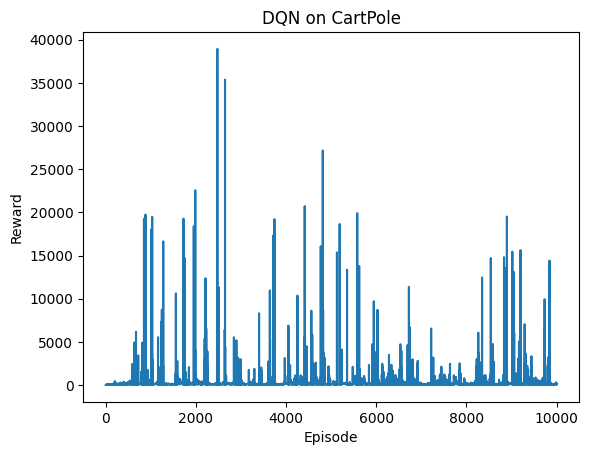

In [1]:
#!pip install matplotlib
import matplotlib.pyplot as plt


plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.ylim(0, 1_000)
plt.title('DQN on CartPole')
plt.show()

NameError: name 'rewards_per_episode' is not defined

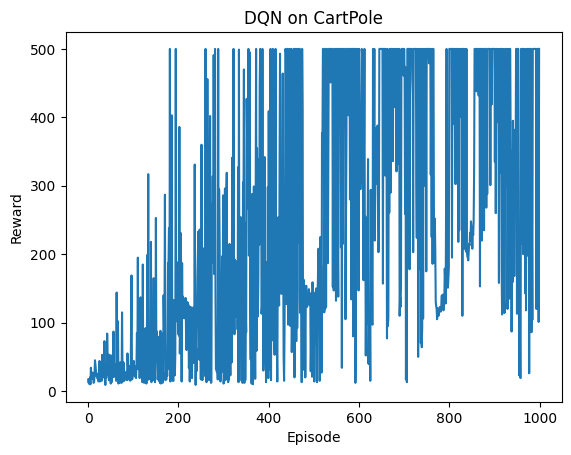